# Projet Python

Auteurs :  
SANOGO Fanta  
ATJI Cheick  
WABO Robin  
BENLARBI Ilias  

## Récupération des données

In [6]:
#Importation des librairies de bases
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
# ignorer les avertissements
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)

###################################  Partie 1 récupération des données brutes dans le dictionnaire dataraw ########################################

# Spécifiez le chemin du dossier contenant les fichiers JSON
dossier = r"C:/Users/Ilies/Desktop/Data/SDA (B.GRAND)/projet_python"

# Initialiser un dictionnaire pour stocker les données brutes des fichiers JSON
dataraw = {}

# Parcourir tous les fichiers du dossier
for fichier in os.listdir(dossier):
    # Vérifier si le fichier a une extension .json
    if fichier.endswith(".json"):
        # Chemin complet vers le fichier JSON
        chemin_fichier = os.path.join(dossier, fichier)
        
        # Ouvrir et lire le contenu du fichier JSON
        with open(chemin_fichier, 'r', encoding='utf-8') as f:
            donnees = json.load(f)  # Charger les données du fichier
            nom_sans_extension = os.path.splitext(fichier)[0]  # Obtenir le nom de fichier sans extension
            dataraw[nom_sans_extension] = donnees  # Ajouter les données au dictionnaire avec le nom de fichier


#################################  Partie 2 création d'un dictionnaire avec les données qui nous intéresse  ####################################

#Créer un dictionnaire avec les colonnes vides
dataclean = {
    "participant": [],
    "time": [],
    "spm": [],
    "avg_pace": [],

    "split_time_1": [], "split_time_2": [], "split_time_3": [], "split_time_4": [],
    "split_avg_pace_1": [], "split_avg_pace_2": [], "split_avg_pace_3": [], "split_avg_pace_4": [],
    "split_stroke_count_1": [], "split_stroke_count_2": [], "split_stroke_count_3": [], "split_stroke_count_4": [],
    "split_stroke_rate_1": [], "split_stroke_rate_2": [], "split_stroke_rate_3": [], "split_stroke_rate_4": [],

    "stroke_count": [], #nombre de rames , QUESTION1
    "pace_kmh": [], #vitesse moyenne kmh , QUESTION2
    "split_pace_kmh_1": [], "split_pace_kmh_2": [], "split_pace_kmh_3": [], "split_pace_kmh_4": [], #vitesse moyenne en kmh/500m QUESTION2
    "stroke_dist": [], #longueur moyenne totale parcourue par coup de rame , QUESTION2
    "split_stroke_dist_1": [], "split_stroke_dist_2": [], "split_stroke_dist_3": [], "split_stroke_dist_4": [],
    #'split_stroke_dist_i' longueur moyenne parcourue par coup de rame/500m , QUESTION2
    "split_calories_1": [],  "split_calories_2": [],  "split_calories_3": [],  "split_calories_4": []   
}

#################################  Partie 3 ajout des données dans notre dictionnaire dataclean  #############################################

#on crée une liste avec le nom de tous les fichiers JSON
noms_json = [fichier[:-5] for fichier in os.listdir(dossier) if fichier.endswith('.json')]
#on utilise la variable nfichier pour ajouter les données brutes pour chaque fichier
for nfichier in noms_json:

    # Parcourir les participants dans les données brutes
    for participant in dataraw[nfichier]['results']['participants']:
        
        # Ajouter les informations globales du participant
        dataclean['participant'].append(participant.get('participant'))
        dataclean['avg_pace'].append(participant.get('avg_pace'))
        dataclean['spm'].append(participant.get('spm'))
        dataclean['time'].append(participant.get('time'))
        dataclean['stroke_count'].append(participant.get('stroke_count'))
        dataclean['pace_kmh'].append(participant.get('pace_kmh'))
        dataclean['stroke_dist'].append(participant.get('stroke_dist'))

        
        # Parcourir les splits et les ajouter au dictionnaire
        for i, split in enumerate(participant['splits'][:4]):  # Limiter à 4 splits
            dataclean[f'split_time_{i+1}'].append(split.get('split_time'))
            dataclean[f'split_avg_pace_{i+1}'].append(split.get('split_avg_pace'))
            dataclean[f'split_stroke_count_{i+1}'].append(split.get('split_stroke_count'))
            dataclean[f'split_stroke_rate_{i+1}'].append(split.get('split_stroke_rate'))
            dataclean[f'split_pace_kmh_{i+1}'].append(split.get('split_pace_kmh'))    
            dataclean[f'split_stroke_dist_{i+1}'].append(split.get('split_stroke_dist'))
            dataclean[f'split_calories_{i+1}'].append(split.get('split_calories'))

            
#################################  Partie 4 création du dataframe #########################################################################
# Maintenant, dataclean est prêt à être converti en DataFrame
df = pd.DataFrame(dataclean)

#on active l'option pour afficher toutes les colonnes du dataframe pour éviter d'avoir des points "..."
pd.set_option('display.max_columns', None)

# Afficher le DataFrame
#display(df)

## Question 1

Extraire les données des fichiers et les placer dans un tableau restituant pour chaque rameur sa performance, à savoir son temps sur 2000m, la cadence moyenne sur 2000m, le nombre de coups de rames sur 2000m, le temps sur chaque portion de 500m, la cadence moyenne sur chaque portion de 500m, le nombre de coups de rame sur chaque portion de 500m. Le tableau aura une ligne par rameur.



In [8]:
#Question 1

#calcul du nombre de rames sur 2000m
df['stroke_count'] = df['split_stroke_count_1'] + df['split_stroke_count_2'] + df['split_stroke_count_3'] + df['split_stroke_count_4']


variables = [
    "participant", #nom du participant
    "time", #temps total
    "spm", #cadence moyenne sur 2000m
    "stroke_count", #nombre de coups de rame sur 2000m
    "split_avg_pace_1", "split_avg_pace_2", "split_avg_pace_3", "split_avg_pace_4", #temps sur chaque portion de 500m
    "split_stroke_rate_1", "split_stroke_rate_2", "split_stroke_rate_3", "split_stroke_rate_4", #cadence moyenne sur chaque portion de 500m
    "split_stroke_count_1", "split_stroke_count_2", "split_stroke_count_3", "split_stroke_count_4" #nombre de coups de rame sur chaque portion de 500m
]

display (df[variables])

participant     time  spm  stroke_count split_avg_pace_1 split_avg_pace_2  \
0       Maxime   6:33.4   28           186           1:41.6           1:42.0   
1     Célestin   7:01.8   28           199           1:43.1           1:46.9   
2       Julien   7:47.0   26           210           1:56.4           2:00.5   
3         Neve   8:12.4   27           229           2:03.5           2:07.2   
4         Eric   7:57.3   27           219           1:59.4           2:01.2   
5      Edouard   8:03.7   30           242           1:54.8           2:05.5   
6     Baptiste   8:21.1   24           208           1:58.6           2:05.4   
7         Loïs   8:24.1   30           254           1:59.1           2:10.2   
8        Usama   7:54.8   27           214           1:52.8           2:02.3   
9          Noé   8:05.8   34           280           1:55.7           2:03.6   
10  Jacqueline   8:29.2   28           238           2:04.9           2:07.5   
11     Emilien   8:46.9   25           223           2:05.0           2:13.6   
12         Léa   8:21.9   28           241           1:58.3           2:04.6   
13      Orlane   8:49.7   30           272           2:10.3           2:14.1   
14        Anaë   9:46.9   24           239           2:13.4           2:30.6   
15         Tom   9:59.6   31           317           2:22.4           2:32.2   
16       Alice   7:58.1   28           229           1:59.4           2:00.6   
17        Ivan   8:41.9   31           274           2:01.1           2:11.0   
18       Lison   8:56.7   30           275           2:08.2           2:14.4   
19   Charlotte   9:15.9   29           275           2:11.1           2:19.4   
20       Merle   9:17.3   30           279           2:13.2           2:19.0   
21     Léonore   9:44.0   25           248           2:17.9           2:28.5   
22     Valérie   9:56.3   28           279           2:24.0           2:30.8   
23      Amaury  10:47.1   34           372           2:41.7           2:46.8   
24      Thomas   6:59.5   33           234           1:41.0           1:45.5   
25      Jerome   7:02.0   31           224           1:44.0           1:45.5   
26    Corentin   7:15.9   27           200           1:48.3           1:50.9   
27   Dominique   8:59.7   28           260           2:14.1           2:18.2   
28       Nancy   8:31.4   29           252           2:03.7           2:07.9   
29      Eloïse   8:39.5   30           262           2:08.7           2:08.5   
30       Julie   8:48.9   30           266           2:08.1           2:14.4   
31       Hervé   8:49.9   27           242           2:07.2           2:13.4   

   split_avg_pace_3 split_avg_pace_4  split_stroke_rate_1  \
0            1:37.6           1:32.1                   26   
1            1:47.3           1:44.4                   27   
2            1:55.2           1:54.8                   25   
3            2:02.8           1:58.8                   26   
4            2:01.2           1:55.5                   28   
5            2:05.3           1:58.1                   31   
6            2:10.7           2:06.5                   27   
7            2:09.4           2:05.4                   31   
8            2:03.1           1:56.7                   28   
9            2:04.6           2:01.9                   35   
10           2:08.9           2:07.9                   28   
11           2:16.9           2:11.3                   30   
12           2:09.9           2:09.2                   31   
13           2:13.2           2:12.1                   31   
14           2:35.2           2:27.7                   29   
15           2:31.3           2:33.7                   32   
16           2:00.3           1:57.8                   30   
17           2:15.3           2:14.5                   33   
18           2:22.1           2:12.0                   32   
19           2:22.8           2:22.6                   32   
20           2:24.4           2:20.7                   32   
21           2:29.4 

## Question 2

En déduire pour chaque participant la vitesse moyenne en km/h sur 2000m, la vitesse moyenne en km/h sur chaque portion de 500m, la longueur moyenne parcourue par coup de rame sur 2000m, la longueur moyenne parcourue par coup de rame sur chaque portion de 500m.

In [10]:
#### Question 2

########### Calcul de la vitesse moyenne en kmH sur 2000m ##########
# Soit 'pace_kmh' la vitesse en km/h et 'split_time_i' le temps par portion de 500m en décasecondes
# Pour calculer 'pace_kmh', nous avons utilisé la formule suivante: pace_kmh = 2km / [(somme des 'split_time_i') divisé par 36000das pour passer en heure]

df['pace_kmh'] = round(2 / ( (df['split_time_1'] + df['split_time_2'] + df['split_time_3'] + df['split_time_4']) /36000 ), 2)

########## Calcul de la vitesse moyenne en kmH sur chaque 500m ##########
# Soit 'split_pace_kmh_' la vitesse en km/h pour chaque portion de 500m. 
# Pour calculer 'split_pace_kmh_', nous avons utilisé la formule suivante : split_pace_kmh_ = 0.5km / ('split_time_i')

# Fonction pour calculer convertir la vitesse par portion en km/h
def pace_fct(x):
    y = round(0.5 / (x / 36000 ), 2)
    return y

# Boucle pour les 4 portions de 500m
for  i in range (1, 5):
    df[f'split_pace_kmh_{i}'] = df[f'split_time_{i}'].apply(pace_fct)



########## Longueur moyenne de parcourue par coup de rame sur 2000m ##########
# Soit 'stroke_dist' la longueur moyenne totale par coup de rame par metre et 'stroke_count' le nombre de coup de rame total
# Pour calculer la longueur moyenne, nous avons utilisé la formule suivante : 'stroke_dist' = 2000m / 'stroke_count_i'
df['stroke_dist'] = round(2000 / (df['stroke_count']), 2)


########## Longueur moyenne parcourue par coup de rame sur chaque portion de 500m ##########
# Soit 'split_stroke_dist_i' la longueur moyenne parcourue par coup de rame pour 500m et 'split_stroke_count_i'le nombre de coup de rame total par portion
# Pour calculer la longueur moyenne, nous avons utilisé la formule suivante : 'stroke_dist_i' = 500m / 'split_stroke_count_i'

# Fonction pour calculer le nombre de coups de rame par portion de 500m
def strokedist_fct(x):
    y = round(500 / x, 2)
    return y

# Boucle pour les 4 portions de 500m
for  i in range (1, 5):
    df[f'split_stroke_dist_{i}'] = df[f'split_stroke_count_{i}'].apply(strokedist_fct)


# Données à afficher sur le DataFrame
variables = [
    "participant", #nom du participant
    "time", #temps total
    'pace_kmh', #vitesse moyenne en kmH sur 2000m
    'split_pace_kmh_1', #vitesse moyenne en kmH de 0 à 500m
    'split_pace_kmh_2', #vitesse moyenne en kmH de 500 à 1000m
    'split_pace_kmh_3', #vitesse moyenne en kmH de 1000 à 1500m
    'split_pace_kmh_4', #vitesse moyenne en kmH de 1500 à 2000m
    'stroke_dist', #longueur moyenne de parcourue par coup de rame sur 2000m
    'split_stroke_dist_1', #longueur moyenne parcourue par coup de rame de 0 à 500m
    'split_stroke_dist_2', #longueur moyenne parcourue par coup de rame de 500 à 1000m
    'split_stroke_dist_3', #longueur moyenne parcourue par coup de rame de 1000 à 1500m
    'split_stroke_dist_4' #longueur moyenne parcourue par coup de rame de 1500 à 2000m
]

display (df[variables])

participant     time  pace_kmh  split_pace_kmh_1  split_pace_kmh_2  \
0       Maxime   6:33.4     18.31             17.72             17.65   
1     Célestin   7:01.8     17.07             17.46             16.84   
2       Julien   7:47.0     15.42             15.46             14.94   
3         Neve   8:12.4     14.63             14.57             14.15   
4         Eric   7:57.3     15.08             15.08             14.85   
5      Edouard   8:03.7     14.89             15.68             14.34   
6     Baptiste   8:21.1     14.37             15.18             14.35   
7         Loïs   8:24.1     14.28             15.11             13.82   
8        Usama   7:54.8     15.16             15.96             14.72   
9          Noé   8:05.8     14.82             15.56             14.56   
10  Jacqueline   8:29.2     14.14             14.41             14.12   
11     Emilien   8:46.9     13.67             14.40             13.47   
12         Léa   8:21.9     14.34             15.22             14.45   
13      Orlane   8:49.7     13.59             13.81             13.42   
14        Anaë   9:46.9     12.27             13.49             11.95   
15         Tom   9:59.6     12.01             12.64             11.83   
16       Alice   7:58.1     15.06             15.08             14.93   
17        Ivan   8:41.9     13.80             14.86             13.74   
18       Lison   8:56.7     13.42             14.04             13.39   
19   Charlotte   9:15.9     12.95             13.73             12.91   
20       Merle   9:17.3     12.92             13.51             12.95   
21     Léonore   9:44.0     12.33             13.05             12.12   
22     Valérie   9:56.3     12.07             12.50             11.94   
23      Amaury  10:47.1     11.13             11.13             10.79   
24      Thomas   6:59.5     17.17             17.82             17.06   
25      Jerome   7:02.0     17.06             17.31             17.06   
26    Corentin   7:15.9     16.52             16.62             16.23   
27   Dominique   8:59.7     13.34             13.42             13.02   
28       Nancy   8:31.4     14.08             14.55             14.07   
29      Eloïse   8:39.5     13.86             13.99             14.01   
30       Julie   8:48.9     13.62             14.05             13.39   
31       Hervé   8:49.9     13.59             14.15             13.49   

    split_pace_kmh_3  split_pace_kmh_4  stroke_dist  split_stroke_dist_1  \
0              18.44             19.54        10.75                11.36   
1              16.78             17.24        10.05                10.87   
2              15.62             15.68         9.52                10.42   
3              14.66             15.15         8.73                 9.26   
4              14.85             15.58         9.13                 8.93   
5              14.37             15.24         8.26                 8.47   
6              13.77             14.23         9.62                 9.43   
7              13.91             14.35         7.87                 8.20   
8              14.62             15.42         9.35                 9.43   
9              14.45             14.77         7.14                 7.35   
10             13.96             14.07         8.40                 8.62   
11             13.15             13.71         8.97                 7.94   
12             13.86             13.93         8.30                 8.20   
13             13.51             13.63         7.35                 7.46   
14             11.60             12.19         8.37                 7.81   
15             11.90             11.71         6.31                 6.58   
16             14.96             15.28         8.73                 8.33   
17             13.30             13.38         7.30                 7.46   
18             12.67             13.64         7.27                 7.35   
19             12.61             12.62         7.27                 7.14 

## Question 3

Placer sur un graphique admettant en abscisse la cadence moyenne sur 500 et en ordonnée la longueur moyenne du coup sur 500 tous les points correspondant aux enregistrements sur 500m. A quelle cadence la vitesse maximale est-elle atteinte ? A quel point cela correspond-il sur le graphique ?

In [12]:
df

participant     time  spm avg_pace  split_time_1  split_time_2  \
0       Maxime   6:33.4   28   1:38.3          1016          1020   
1     Célestin   7:01.8   28   1:45.4          1031          1069   
2       Julien   7:47.0   26   1:56.7          1164          1205   
3         Neve   8:12.4   27   2:03.1          1235          1272   
4         Eric   7:57.3   27   1:59.3          1194          1212   
5      Edouard   8:03.7   30   2:00.9          1148          1255   
6     Baptiste   8:21.1   24   2:05.2          1186          1254   
7         Loïs   8:24.1   30   2:06.0          1191          1302   
8        Usama   7:54.8   27   1:58.7          1128          1223   
9          Noé   8:05.8   34   2:01.4          1157          1236   
10  Jacqueline   8:29.2   28   2:07.3          1249          1275   
11     Emilien   8:46.9   25   2:11.7          1250          1336   
12         Léa   8:21.9   28   2:05.4          1183          1246   
13      Orlane   8:49.7   30   2:12.4          1303          1341   
14        Anaë   9:46.9   24   2:26.7          1334          1506   
15         Tom   9:59.6   31   2:29.9          1424          1522   
16       Alice   7:58.1   28   1:59.5          1194          1206   
17        Ivan   8:41.9   31   2:10.4          1211          1310   
18       Lison   8:56.7   30   2:14.1          1282          1344   
19   Charlotte   9:15.9   29   2:18.9          1311          1394   
20       Merle   9:17.3   30   2:19.3          1332          1390   
21     Léonore   9:44.0   25   2:26.0          1379          1485   
22     Valérie   9:56.3   28   2:29.0          1440          1508   
23      Amaury  10:47.1   34   2:41.7          1617          1668   
24      Thomas   6:59.5   33   1:44.8          1010          1055   
25      Jerome   7:02.0   31   1:45.5          1040          1055   
26    Corentin   7:15.9   27   1:48.9          1083          1109   
27   Dominique   8:59.7   28   2:14.9          1341          1382   
28       Nancy   8:31.4   29   2:07.8          1237          1279   
29      Eloïse   8:39.5   30   2:09.8          1287          1285   
30       Julie   8:48.9   30   2:12.2          1281          1344   
31       Hervé   8:49.9   27   2:12.4          1272          1334   

    split_time_3  split_time_4 split_avg_pace_1 split_avg_pace_2  \
0            976           921           1:41.6           1:42.0   
1           1073          1044           1:43.1           1:46.9   
2           1152          1148           1:56.4           2:00.5   
3           1228          1188           2:03.5           2:07.2   
4           1212          1155           1:59.4           2:01.2   
5           1253          1181           1:54.8           2:05.5   
6           1307          1265           1:58.6           2:05.4   
7           1294          1254           1:59.1           2:10.2   
8           1231          1167           1:52.8           2:02.3   
9           1246          1219           1:55.7           2:03.6   
10          1289          1279           2:04.9           2:07.5   
11          1369          1313           2:05.0           2:13.6   
12          1299          1292           1:58.3           2:04.6   
13          1332          1321           2:10.3           2:14.1   
14          1552          1477           2:13.4           2:30.6   
15          1513          1537           2:22.4           2:32.2   
16          1203          1178           1:59.4           2:00.6   
17          1353          1345           2:01.1           2:11.0   
18          1421          1320           2:08.2           2:14.4   
19          1428          1426           2:11.1           2:19.4   
20          1444          1407           2:13.2           2:19.0   
21          1494          1482           2:17.9           2:28.5   
22          1516          1499           2:24.0           2:30.8   
23          1629          1557           2:41.7           2:46.8   
24          1076         

In [13]:
# Chercher la Vitesse 'vmax' sur les colonnes vitesses des 4 splits
vmax = np.max(df.loc[:,'split_pace_kmh_1':'split_pace_kmh_4'])

# Trouver les indexes lignes 'vmax_idxrow' et colonnes 'vmax_idxcolumn' de 'v_max'
indexes = np.where(df == vmax)
vmax_idxrow, vmax_idxcolumn = indexes[0][0], indexes[1][0]

# Trouver la cadence_moyenne et la distance de coup de rame correspondant à v_max
split = df.columns[vmax_idxcolumn][-1] # extraire le étape du split
stroke_rate_max = df.loc[vmax_idxrow, f'split_stroke_rate_{split}']
stroke_dist_max = df.loc[vmax_idxrow, f'split_stroke_dist_{split}']
nom = df.loc[vmax_idxrow, 'participant']

nom, stroke_rate_max, stroke_dist_max

('Maxime', 34, 9.62)

In [14]:
########### Définition de la taille et de la longueur du graphe ##########
plt.style.use('dark_background')
plt.figure(figsize=(9, 8))

########## On ajoute les données dans notre graphe ##########
plt.scatter(df['split_stroke_rate_1'], df['split_stroke_dist_1'], c= df['pace_kmh'], cmap = 'viridis',
            marker = '8', s = 60, label='split_1')
plt.scatter(df['split_stroke_rate_2'], df['split_stroke_dist_2'], c= df['pace_kmh'], cmap = 'viridis',
            marker = '+', s = 60, label='split_2')
plt.scatter(df['split_stroke_rate_3'], df['split_stroke_dist_3'], c= df['pace_kmh'], cmap = 'viridis',
            marker = '^', s = 60, label='split_3')
plt.scatter(df['split_stroke_rate_4'], df['split_stroke_dist_4'], c= df['pace_kmh'], cmap = 'viridis',
            marker = 's', s = 60, label='split_4')
plt.colorbar(label='Vitesse en (km/h)')

# On trace le point en rouge pour vmax
plt.scatter(stroke_rate_max, stroke_dist_max, color='red', lw = 3, s=20, 
            label=f"longueur: {stroke_dist_max} m/coup \nCadence moy: {stroke_rate_max} m/min", )

# Afficher le nom du participant ayant la plus grande vitesse 
plt.text(stroke_rate_max - 2, stroke_dist_max + 0.3, f'{nom}: {vmax} km/h', color='red', fontsize=14)

########## Mise en forme du graphe##########
# Ajouter la barre de couleur, les labels, le titre et la légende
plt.xlabel('Split Stroke Rate (Cadence moyenne)')
plt.ylabel('Split Stroke Distance (Longueur moyenne par coup)')
plt.title('Relation entre la Cadence moyenne et la longueur moyenne par coup\n')
plt.legend(title = 'Splits')
plt.tight_layout()
plt.grid(False)

plt.savefig(os.path.join(dossier,'figure_projet.png'))
plt.show()

## Partie Innovatrice

### Analyse des performances en fonction du genre

In [17]:
# Créer une variable sexe pour établir des statistiques de groupe

# Nous prenons comme hypothèse les noms masculins suivants : 

nom_masculin = ['Maxime', 'Célestin', 'Julien', 'Eric', 'Edouard', 'Baptiste',
                'Usama', 'Noé', 'Emilien', 'Tom', 'Ivan', 'Merle', 'Amaury',
                'Thomas', 'Jerome', 'Corentin', 'Hervé']

df['sexe'] = np.where(df['participant'].isin(nom_masculin), 'homme', 'femme')
df['sexe'] = df['sexe'].astype('category')

#### Statistiques sur la vitesse en fonction du genre

In [19]:
# Statistiques sur les vitesses de groupes par split
list_vitesse = df.columns.tolist()[22:26]
stats = ['median', 'min', 'max']
tbl_vitesse = df.groupby('sexe').agg({var: stats for var in list_vitesse})

In [20]:
# Statistiques sur les temps de groupes réalisés par split 
list_temps = df.columns.tolist()[4:8]
list_temps = [x for x in list_temps if not x in ['spm','avg_pace']]
tbl_time = df.groupby('sexe').agg({var: stats for var in list_temps})

In [21]:
# Cette partie a pour but de créer deux lignes dans les tableaux
# croisés pour faire apparaitre les noms des participants correspondant
# aux statistiques observées

df.sort_values(by = 'sexe', inplace = True)

for tbl in (tbl_vitesse, tbl_time):
    
    stats_femme = tbl.iloc[0,:].values.tolist()
    stats_homme = tbl.iloc[1,:].values.tolist()
    dico = {"femme": stats_femme, "homme": stats_homme}
    nom_femme, nom_homme = [], []
    

    for sex, stats in dico.items():
        for val in stats:
            nom = df[(df.sexe == sex) & (df.isin([val]).any(axis=1))]
            if sex == "femme":
                nom_femme.append(nom.iloc[0,0])
            else:
                nom_homme.append(nom.iloc[0,0])
            
    tbl.loc[len(tbl)] = nom_femme
    tbl.loc[len(tbl)] = nom_homme
    tbl.rename(index = {tbl.index[-1]: 'nom_homme',
                        tbl.index[-2]: 'nom_femme'},
               inplace=True)
    tbl.reset_index(inplace = True)
    tbl.iloc[[1, 2]] = tbl.iloc[[2, 1]].values
    tbl.set_index('sexe', inplace = True)


In [32]:
# Compter les participants par sexe
df['sexe'].value_counts()

sexe
homme    17
femme    15
Name: count, dtype: int64

In [23]:
tbl_vitesse.transpose()

sexe                     femme  nom_femme  homme nom_homme
split_pace_kmh_1 median  14.04      Lison  15.46    Julien
                 min      12.5    Valérie  11.13    Amaury
                 max     15.22        Léa  17.82    Thomas
split_pace_kmh_2 median  13.42  Dominique  14.56       Noé
                 min     11.94    Valérie  10.79    Amaury
                 max     14.93      Alice  17.65    Maxime
split_pace_kmh_3 median  13.51     Orlane  14.45       Noé
                 min      11.6       Anaë  11.05    Amaury
                 max     14.96      Alice  18.44    Maxime
split_pace_kmh_4 median  13.88     Eloïse  15.24   Edouard
                 min     12.01    Valérie  11.56    Amaury
                 max     15.28      Alice  19.54    Maxime

In [24]:
tbl_time.transpose()

sexe                  femme  nom_femme   homme nom_homme
split_time_1 median  1282.0      Lison  1164.0    Julien
             min       1183        Léa    1010    Thomas
             max       1440    Valérie    1617    Amaury
split_time_2 median  1341.0  Dominique  1236.0       Noé
             min       1206      Alice    1020    Maxime
             max       1508    Valérie    1668    Amaury
split_time_3 median  1332.0     Orlane  1246.0       Noé
             min       1203      Alice     976    Maxime
             max       1552       Anaë    1629    Amaury
split_time_4 median  1297.0     Eloïse  1181.0   Edouard
             min       1178      Alice     921    Maxime
             max       1499    Valérie    1557    Amaury

##### Analyse synthétique des 2 tableaux
Les deux tableaux tbl_vitesse et tbl_time montrent les performances vitesses et temps
sur l'ensemble des splits pour chaque sexe et les noms associés aux performances.
Sur l'ensemble des données, on constate que les hommes réalisent en moyenne et 
même individuellement de meilleures performances que les femmes. On trouve chez les femmes,
respectivement chez les hommes "Alice" et "Maxime" qui réalisent les meilleures stats et
conservent leurs pôles positions (1er rang) sur les plits 2,3 et 4. A l'opposé, dans le même
ordre, on retrouve "Valérie" et "Amaury" qui réalisent les pires performances en termes de 
temps et vitesse.

#### Graphiques subplots sur les performances

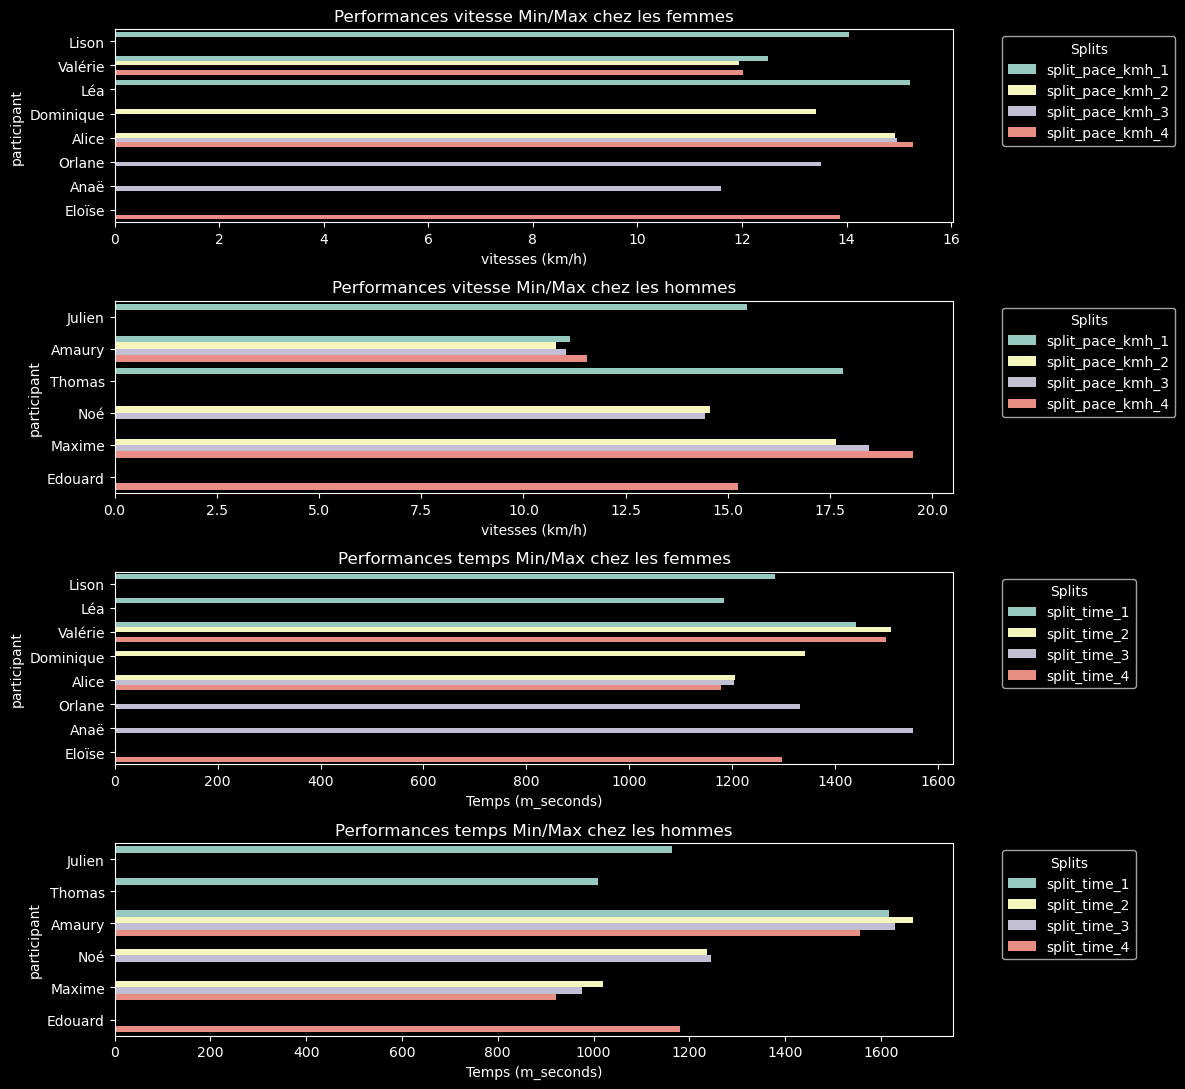

In [27]:
# importation de seaborn
import seaborn as sns

# Définition des tables pour les graphiques
tab1 = tbl_vitesse.transpose().reset_index()
tab2 = tbl_time.transpose().reset_index()

# Thème de fonds
plt.style.use('dark_background')

# Définir 4 subplots et la taille de la figure
fig, ax = plt.subplots(4,1, figsize = (12,11))

# Barplot horizontale performance vitesse min/max chez les femmes
sns.barplot(data = tab1, hue="level_0", x="femme", y="nom_femme", orient = 'h',
            ax = ax[0])
ax[0].set_title('Performances vitesse Min/Max chez les femmes')
ax[0].set_xlabel('vitesses (km/h)')
ax[0].set_ylabel('participant')
ax[0].legend(title="Splits", bbox_to_anchor=(1.05, 1), loc='upper left')

# Barplot horizontal performance vitesse min/max chez les hommes
sns.barplot(data = tab1, hue="level_0", x="homme", y="nom_homme", orient = 'h',
            ax = ax[1])
ax[1].set_title('Performances vitesse Min/Max chez les hommes')
ax[1].set_xlabel('vitesses (km/h)')
ax[1].set_ylabel('participant')
ax[1].legend(title="Splits", bbox_to_anchor=(1.05, 1), loc='upper left')

# Barplot horizontal performance temps min/max chez les femmes
sns.barplot(data = tab2, hue="level_0", x="femme", y="nom_femme", orient = 'h',
            ax = ax[2])
ax[2].set_title('Performances temps Min/Max chez les femmes')
ax[2].set_xlabel('Temps (m_seconds)')
ax[2].set_ylabel('participant')
ax[2].legend(title="Splits", bbox_to_anchor=(1.05, 1), loc='upper left')

# Barplot horizontal performance temps min/max chez les hommes
sns.barplot(data = tab2, hue="level_0", x="homme", y="nom_homme", orient = 'h',
            ax = ax[3])
ax[3].set_title('Performances temps Min/Max chez les hommes')
ax[3].set_xlabel('Temps (m_seconds)')
ax[3].set_ylabel('participant')
ax[3].legend(title="Splits", bbox_to_anchor=(1.05, 1), loc='upper left')

# Affichage
plt.tight_layout()
plt.show()

#### Statistiques sur les calories en fonction du genre

In [29]:
# la moyenne des calories brulés pour chaque participant sur les 4 splits
df['calories_moyenne'] = df[[f'split_calories_{i+1}' for i in range(4)]].mean(axis=1)


# Afficher uniquement les colonnes 'participant', 'sexe', et les calories par split
display(df[['participant', 'sexe', 'split_calories_1', 'split_calories_2', 'split_calories_3', 'split_calories_4', 'calories_moyenne']])

participant   sexe  split_calories_1  split_calories_2  split_calories_3  \
19   Charlotte  femme                30                28                28   
29      Eloïse  femme                31                30                30   
28       Nancy  femme                32                31                30   
3         Neve  femme                32                31                32   
27   Dominique  femme                29                29                29   
21     Léonore  femme                29                27                27   
16       Alice  femme                33                33                33   
7         Loïs  femme                33                30                30   
30       Julie  femme                31                29                29   
18       Lison  femme                31                29                28   
10  Jacqueline  femme                32                31                30   
22     Valérie  femme                28                27                27   
12         Léa  femme                34                31                30   
13      Orlane  femme                30                29                29   
14        Anaë  femme                30                27                26   
0       Maxime  homme                41                40                43   
25      Jerome  homme                39                38                38   
26    Corentin  homme                37                36                36   
24      Thomas  homme                41                38                37   
23      Amaury  homme                26                25                26   
15         Tom  homme                28                27                27   
17        Ivan  homme                33                30                29   
11     Emilien  homme                32                29                29   
9          Noé  homme                35                32                31   
8        Usama  homme                36                32                32   
6     Baptiste  homme                33                31                30   
5      Edouard  homme                35                31                31   
4         Eric  homme                33                32                32   
2       Julien  homme                34                33                34   
1     Célestin  homme                40                38                37   
20       Merle  homme                30                28                28   
31       Hervé  homme                31                29                29   

    split_calories_4  calories_moyenne  
19                28             28.50  
29                30             30.25  
28                30             30.75  
3                 33             32.00  
27                30             29.25  
21                27             27.50  
16                33             33.00  
7                 31             31.00  
30                30             29.75  
18                30             29.50  
10                31             31.00  
22                27             27.25  
12                30             31.25  
13                30             29.50  
14                27             27.50  
0                 47             42.75  
25                38             38.25  
26                38             36.75  
24                38             38.50  
23                26             25.75  
15                26             27.00  
17                29             30.25  
11                30             30.00  
9                 32             32.50  
8                 34             33.50  
6                 31             31.25  
5                 33             32.50  
4                 34             32.75  
2                 34             33.75  
1                 39             38.50  
20                28             28.50  
31                30             29.75

La suite de l'étude à été déployée sur Render

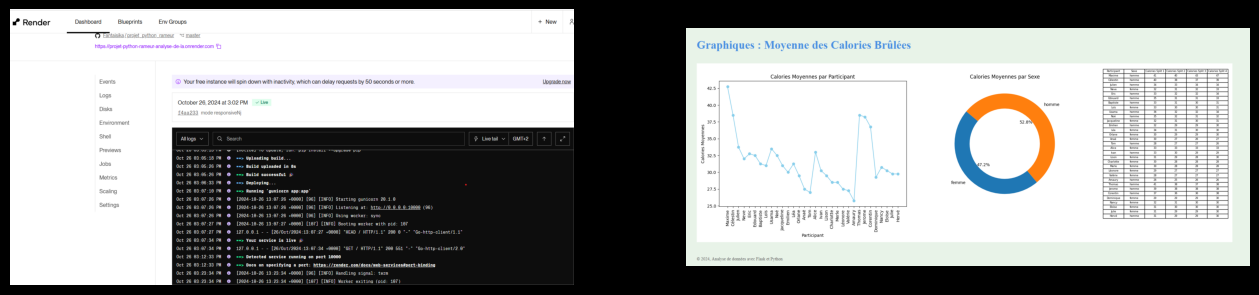

In [34]:
from PIL import Image
import matplotlib.pyplot as plt

# Charger les images
image_path1 = r"C:/Users/Ilies/Desktop/Data/SDA (B.GRAND)/projet_python/deploiement sur render.png"
image_path2 = r"C:/Users/Ilies/Desktop/Data/SDA (B.GRAND)/projet_python/Application_en_local.png"
image1 = Image.open(image_path1)
image2 = Image.open(image_path2)

# Créer une figure avec 2 sous-graphiques
plt.figure(figsize=(16, 12))  

# Afficher la première image
plt.subplot(1, 2, 1)  
plt.imshow(image1)
plt.axis('off')  


plt.subplot(1, 2, 2)  
plt.imshow(image2)
plt.axis('off')  

plt.show()

Analyse descriptive du graphique

Analyse descriptive de la moyenne de calorie brulées par sexe et par participant 

1- Calories Moyennes par Participant :

On observe une variabilité notable dans les calories moyennes brûlées par les participants.
Certains participants, comme Maxime et Thomas, semblent brûler plus de calories que les autres, tandis que d’autres, comme Amaury et Dominique, en brûlent moins.
La tendance montre une baisse de calories pour plusieurs participants, avec des pics occasionnels indiquant des participants spécifiques ayant une dépense énergétique élevée.

2- Calories Moyennes par Sexe :

La répartition des calories moyennes brûlées est assez équilibrée entre les sexes : environ 52.8 % pour les hommes et 47.2 % pour les femmes.
Bien que les hommes aient une légère avance en termes de calories moyennes brûlées, la différence est relativement faible. Cela peut suggérer que la dépense calorique n’est pas très influencée par le sexe dans ce groupe spécifique de participants.

3- Analyse des Splits dans le Tableau :

En examinant le tableau des calories par portion (Split 1 à Split 4), on remarque que la plupart des participants ont des valeurs relativement stables à travers les splits.
Cependant, il y a quelques variations notables chez certains participants, ce qui pourrait indiquer une variation dans l'intensité de l'effort à différents moments de l'activité.

4- Comparaison Individuelle :

Certains participants, comme Thomas et Maxime, maintiennent des valeurs plus élevées dans leurs splits, ce qui pourrait indiquer une capacité à maintenir un effort plus intense ou une endurance supérieure.
D'autres, comme Dominique et Amaury, montrent des valeurs de split plus faibles, ce qui pourrait indiquer une intensité moindre ou une fatigue au fil des portions.